#Тестовое задание для вакансии Стажер Data Scientist


**Задание:**

*Нашей компании нужно сгруппировать клиентов для АБ-тестов. Алгоритм группировки очень простой - взять ID клиента (состоит из 5-7 цифр, например 7412567) и найти сумму всех его цифр. Получившееся число и является номером группы, в которую входит данный клиент.*

*Для того, чтобы понять, насколько хорош такой простой алгоритм, тебе нужно написать следующие диагностические функции:*

*Функция, которая подсчитывает число покупателей, попадающих в каждую группу, если нумерация ID сквозная и начинается с 0. На вход функция получает целое число n_customers (количество клиентов). Функция, аналогичная первой, если ID начинается с произвольного числа. На вход функция получает целые числа: n_customers (количество клиентов) и n_first_id (первый ID в последовательности). Напишите код функций на Python и оформите его в репозиторий Github.* 

Если ID пользователя состоит с 5-7 цифр и начинается с 0, то это выглядит как 00000, 00001 и до 1999999. Начальными нулями в данном случае можно пренебречь.Напишем функцию, которая подсчитает количество групп, каждая из которых будет состоять из суммы цифр ID. Также посчитаем, сколько пользователей попадет в эти группы.


In [1]:
import pandas as pd

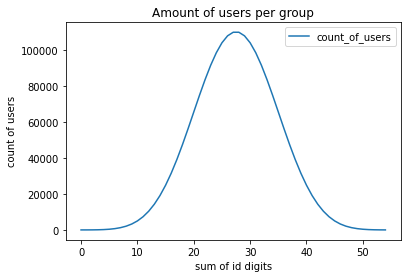

In [2]:
def counter(n_customers):
    ids = list(range(n_customers))
    list_sum = []
    for i in ids:
        sum = 0
        for digit in str(i): 
            sum += int(digit)  
        list_sum.append(sum) 
    groups = {}
    for i in set(list_sum):
        groups[i] = list_sum.count(i)
    df = pd.DataFrame.from_dict([groups]).transpose().reset_index()
    df.columns = ['sum of id digits','count_of_users']
    ax = df.plot(x="sum of id digits",y="count_of_users",title='Amount of users per group')
    ax.set_xlabel("sum of id digits")
    ax.set_ylabel("count of users")
    
counter(1999999)

Для наглядности данные представлены на графике. Видно, что получается 55 групп от 0 до 54. Количество пользователей в них подчиняется нормальному распределению. Это не самый удачный способ делить пользователей на группы для А/Б тестов, где нужны равные количества пользователей в группах

Модифицируем нашу функцию с учетом того, что первый id не равен нулю и задается нами.

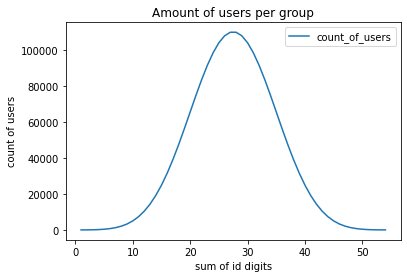

In [3]:
def counter(n_customers,  n_first_id):
    ids = list(range(n_first_id, n_customers))
    list_sum = []
    for i in ids:
        sum = 0
        for digit in str(i): 
            sum += int(digit)  
        list_sum.append(sum) 
    groups = {}
    for i in set(list_sum):
        groups[i] = list_sum.count(i)
    df = pd.DataFrame.from_dict([groups]).transpose().reset_index()
    df.columns = ['sum of id digits','count_of_users']
    ax = df.plot(x="sum of id digits",y="count_of_users",title='Amount of users per group')
    ax.set_xlabel("sum of id digits")
    ax.set_ylabel("count of users")
    
counter(1999999, 34)

Получим ту же самую картину - только групп теперь будет 54 - от 1 до 54.
Вывод: нужно подбирать другие способы для распределения пользователей по группам.